#### Importing all the neccessary & required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

This dataset is about the diabetes dataset where  all the patients which has all the 
descriptions such as age,gender and all other symptoms of diabetes which helps to understand which patient is 
suffering from diabetes or not.

In [2]:
### Importing the dataset into a dataframe 
df=pd.read_csv('diabetes.csv', sep=';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
# These are the feautres of the dataframe.
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [4]:
# Checking the null values in the dataframe
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [5]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
age_map={'Male':1,'Female':0}
df['gender']=df['gender'].map(age_map)
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### we will now seperate the predictors and target values separately into X and y

In [7]:
X = df.drop(columns=['class'])
y = df['class']
print(X.shape)
print(y.shape)

(520, 16)
(520,)


### Splitting dataset to train and test

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=43)
print(x_train.shape)
print(x_test.shape)

(364, 16)
(156, 16)


#### First we will fit a normal decision tree without any fine tuning and check the results

In [47]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

#### Hyperparameter Tuning of a decision tree 

In [48]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

To plot feautre importance of the Decision Tree when max depth = 2

Text(0.5, 1.0, 'Feature Importance')

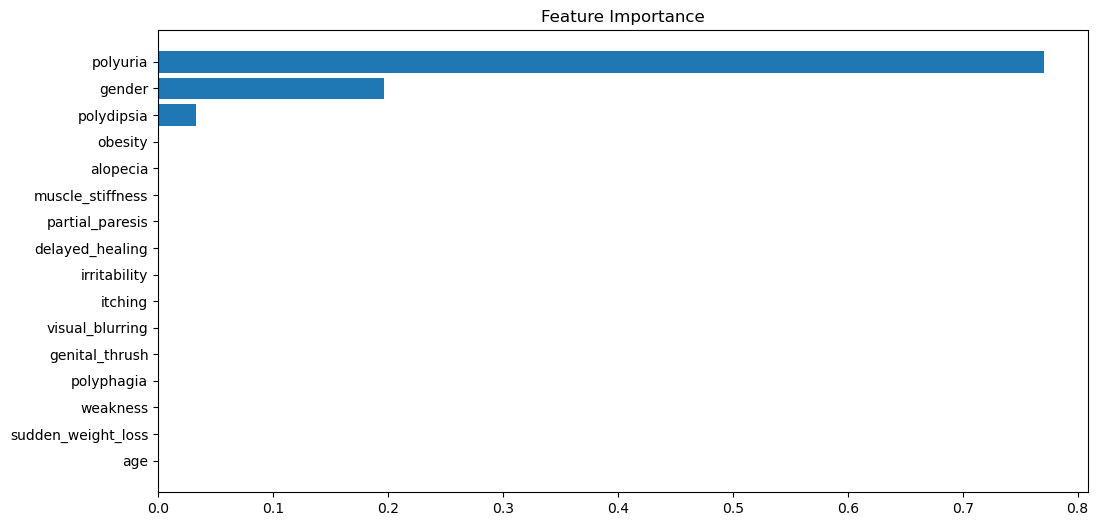

In [49]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')



# Visualizing decision tree when max depth is 2


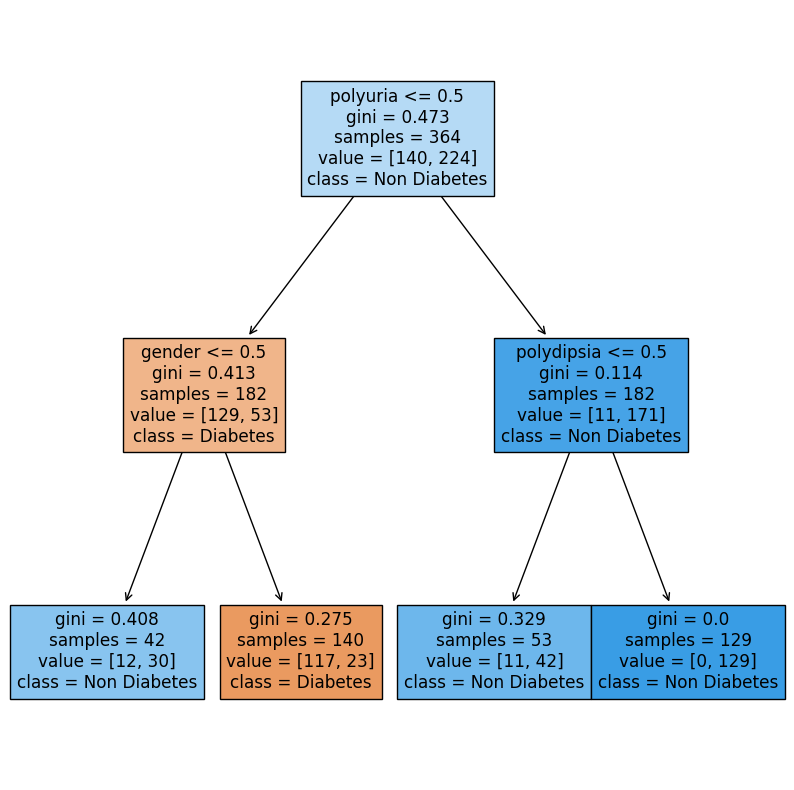

In [50]:
plt.figure(figsize=(10,10))
features = df.columns
classes = ['Diabetes','Non Diabetes']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Note:- This is an iterative process which in every iteration have to tune the max depth and check the metrics of Accuracy, precision , recall and Overfiiting/underfiiting issue.

In [51]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
cf = confusion_matrix(y_train_pred,y_train)
print(cf)

[[139   6]
 [  1 218]]
